In [1]:
from rgb_blending import build_png, seismic_blend_png, line_blend_png, slice_sgy, build_synth
from las_to_spec import las_to_spec, rgb_log

from IPython.display import Image

frequencies = (15,40,60)


In [2]:
path = '../../rgb-explorers/logs/'
logfile = 'F03-03_F03-03_Set.las'

In [3]:
blendarray = rgb_log(path+logfile, frequencies)

Header section Parameter regexp=~P was not found.
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:81: RuntimeWarning: invalid value encountered in sqrt
  c_1 = c_1**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:82: RuntimeWarning: invalid value encountered in greater_equal
  c_1 = np.where(c_1 >= clipping, 1.0, c_1/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:85: RuntimeWarning: invalid value encountered in sqrt
  c_2 = c_2**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:86: RuntimeWarning: invalid value encountered in greater_equal
  c_2 = np.where(c_2 >= clipping, 1.0, c_2/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:89: RuntimeWarning: invalid value encountered in sqrt
  c_3 = c_3**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spe

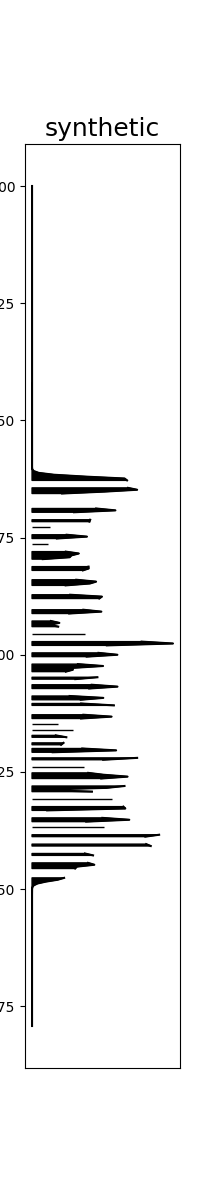

In [4]:
Image(build_synth(blendarray))

In [10]:
line = slice_sgy('x',400)
line.shape[0]

254

In [9]:
import numpy
blend = numpy.zeros((*line.shape, 3))
blend.shape

(254, 461, 3)

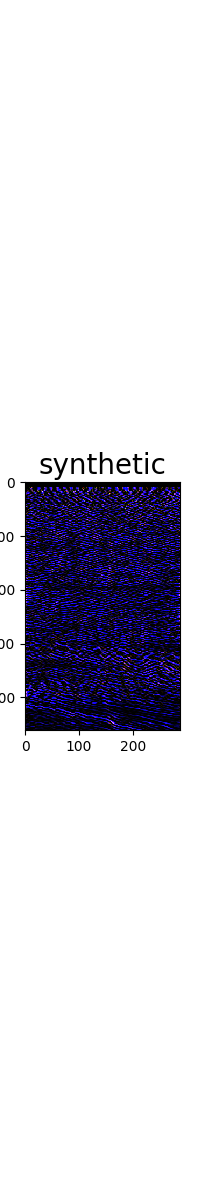

In [5]:
Image(line_blend_png('y',319,frequencies))

In [3]:
logarray = las_to_spec(path+logfile)

Header section Parameter regexp=~P was not found.


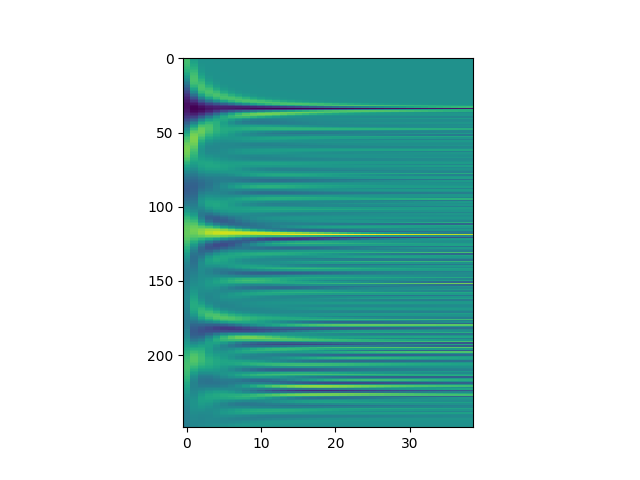

In [4]:
img = build_png(logarray, aspect_ratio=.2)
Image(img)

In [5]:
blendarray = rgb_log(path+logfile, frequencies)
Image(build_synth(blendarray))

Header section Parameter regexp=~P was not found.
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:81: RuntimeWarning: invalid value encountered in sqrt
  c_1 = c_1**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:82: RuntimeWarning: invalid value encountered in greater_equal
  c_1 = np.where(c_1 >= clipping, 1.0, c_1/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:85: RuntimeWarning: invalid value encountered in sqrt
  c_2 = c_2**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:86: RuntimeWarning: invalid value encountered in greater_equal
  c_2 = np.where(c_2 >= clipping, 1.0, c_2/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:89: RuntimeWarning: invalid value encountered in sqrt
  c_3 = c_3**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spe

In [7]:
Image(build_synth(blendarray))

NameError: name 'np' is not defined

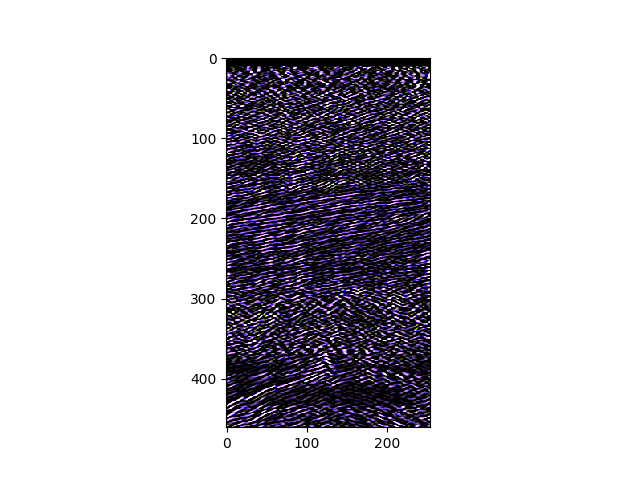

In [11]:
Image(linepng)

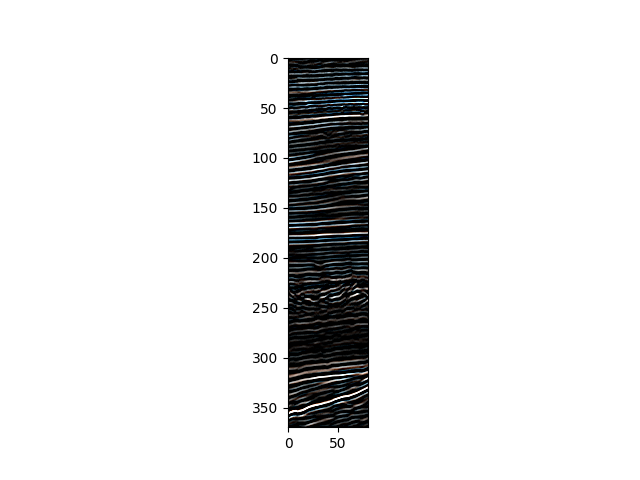

In [7]:
# F03 well inline 319 xline 460
# 250 - 502
# 320 - 560
def freq_to_index((frequencies)):
    indices = np.copy(frequencies)
    for i, f in enumerate(frequencies):
        indices[i] = np.floor((f[i]-3)/2)
    return indices
    
Image(seismic_blend_png('x',50,(20,25,29)))

In [15]:
# F03 well inline 319 xline 460
# 250 - 502
# 320 - 560
import numpy as np
def freq_to_index(frequencies):
    indices = np.copy(frequencies)
    for i, f in enumerate(frequencies):
        indices[i] = (f-3)/2
    return indices


In [16]:
freq_to_index((20,25,30))

array([ 8, 11, 13])

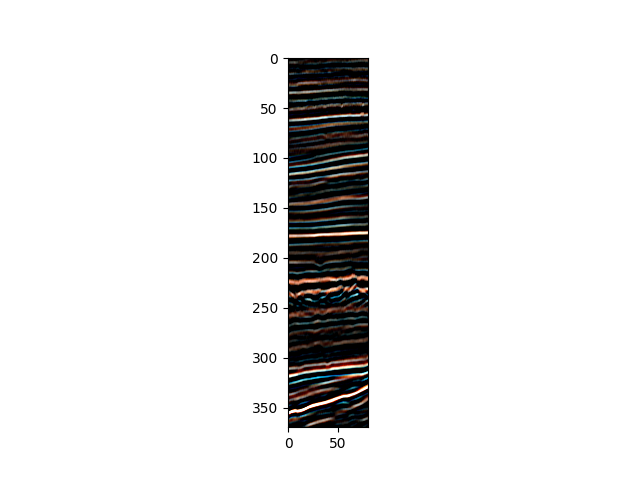

In [19]:
Image(seismic_blend_png('x',50,freq_to_index((20,25,30))))

Header section Parameter regexp=~P was not found.
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:81: RuntimeWarning: invalid value encountered in sqrt
  c_1 = c_1**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:82: RuntimeWarning: invalid value encountered in greater_equal
  c_1 = np.where(c_1 >= clipping, 1.0, c_1/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:85: RuntimeWarning: invalid value encountered in sqrt
  c_2 = c_2**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:86: RuntimeWarning: invalid value encountered in greater_equal
  c_2 = np.where(c_2 >= clipping, 1.0, c_2/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:89: RuntimeWarning: invalid value encountered in sqrt
  c_3 = c_3**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spe

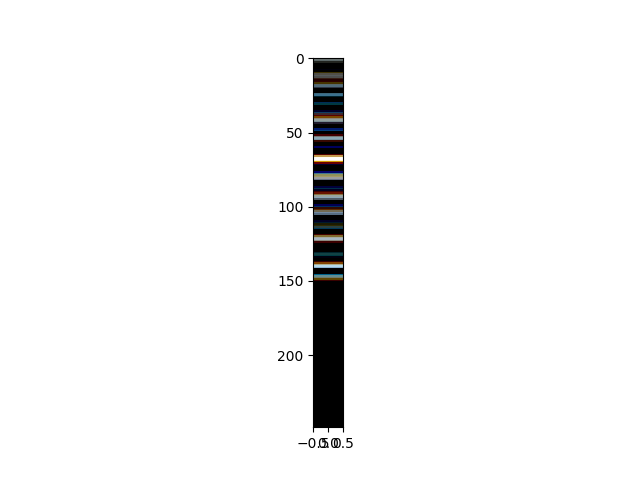

In [22]:
f2log = 'F02-01_F02-01_Set.las'
blendarray = rgb_log(path+f2log,(20,25,30))
Image(build_png(blendarray,aspect_ratio=.05))